# 데이터 정제 - 데이터 스케일링 & 인코딩

## 데이터 스케일링(scaling)
- 상관관계 구조 바꾸지 않음, 피어슨 상관계수 등 변하지 않음
- 회귀계수의 크기는 영향 받음, 각 변수의 표준화 회귀계수를 통해 영향력 비교 용이
- 스케일링이 필요한 통계적 분석 기법 및 머신러닝 모델
  * 거리 기반 모델들(정규화): K-최근접 이웃(KNN), K-평균 군집화, DBSCAN, 계층적 군집분석 등 거리 기반 모델은 스케일링 필수적
  * 가중치 기반 선형 모델들(표준화): 규제항이 있는 회귀(릿지 회귀, 라쏘 회귀, ElasticNet 등), 로지스틱 회귀(분류 문제 위해 사용 시)
  * 서포트 벡터 머신(SVM)(표준화): 마진 계산이 거리 기반으로 작동하므로 필수적
  * 신경망 모델(정규화, 표준화): 시그모이드, tanh 같은 활성화 함수 사용 시, 정규화 추천
  * 주성분 분석(PCA): 분산이 큰 변수에 영향 받기 때문에 필수적
  *  cf) 선형 회귀(예측을 위해 사용될 때는 스케일링 필요 적음), 트리 기반 모델(랜덤포레스트), 확률에 기반한 베이즈 모델 등은 스케일링 필요성 낮음

In [1]:
# 자동차 연비 추정 회귀 모델
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('mpg').dropna()
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

In [2]:
# 두 변수 선택: 무게(weight)와 가속력(acceleration)
X = df[['weight', 'acceleration']]
y = df['mpg']

# 회귀 모델 학습
model = LinearRegression().fit(X, y)

# 회귀계수 확인
print('스케일링 전 계수:', dict(zip(X.columns, model.coef_)))

# 자동차의 무게 및 가속력 확인: 무게와 가속도 범위가 매우 다름 -> 스케일링 필요!
print(df[['weight', 'acceleration']].head())

스케일링 전 계수: {'weight': np.float64(-0.007293095113825713), 'acceleration': np.float64(0.2616503964887878)}
   weight  acceleration
0    3504          12.0
1    3693          11.5
2    3436          11.0
3    3433          12.0
4    3449          10.5


## 주요 스케일링 기법
- 정규화(normalization, 최소값 0, 최대값 1로 변환): MinMaxScaler -> KNN, 신경망 등 거리 기반 모델
  * 정규화는 데이터 분포 모양 유지하면서 값의 크기 상대적인 비율로 변환, 거리 계산 등에서 동등한 범위로 비교 but 이상치에 취약 -> 정규화 이전 이상치 처리하는 작업 필요!
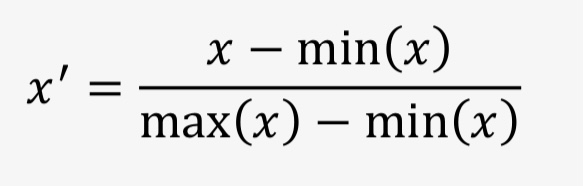
- 표준화(standardization, 평균 0, 표준편차 1로 변환): StandardScaler -> 분산이 비슷해지므로 규제항 회귀모형, SVM 등에서 선호
  * 머신러닝 알고리즘(선형 모델, SVM, 신경망 등), L2 정규화가 있는 모델(릿지 회귀, 라쏘 회귀 등)
  * 표준화는 각 값에서 평균을 빼고 표준편차로 나누어 계산(Z-score), 원본 특성이 정규분포를 따른다는 가정하에 사용 -> 표준정규분포에 근사
  * 모든 값을 평균 중심으로 모으므로 Min-Max 정규화보다는 극단값(이상치) 영향 완화됨, 이상치가 있을 때 Min-Max Scaling < Standardization < Robust Scaling
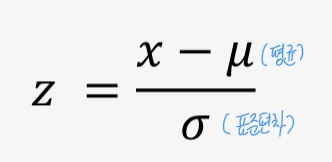
- RobustScaler: 이상치에 강함, 이상치 많은 데이터에 적합
- MaxAbsScaler: 0을 중심으로 하여 -1, 1 범위로 스케일링, 희소 행렬에 유리
- QuantileTransformer: 백분위수 활용 비선형 균등분포로 변환(순위 기반)
- Normalizer(정규화): 다른 스케일러와 달리 행 단위 처리(텍스트 전처리)
- PowerTransformer: 비선형 스케일링을 통해 원래의 분포를 왜곡하여 데이터를 정규분포에 가깝게 변환

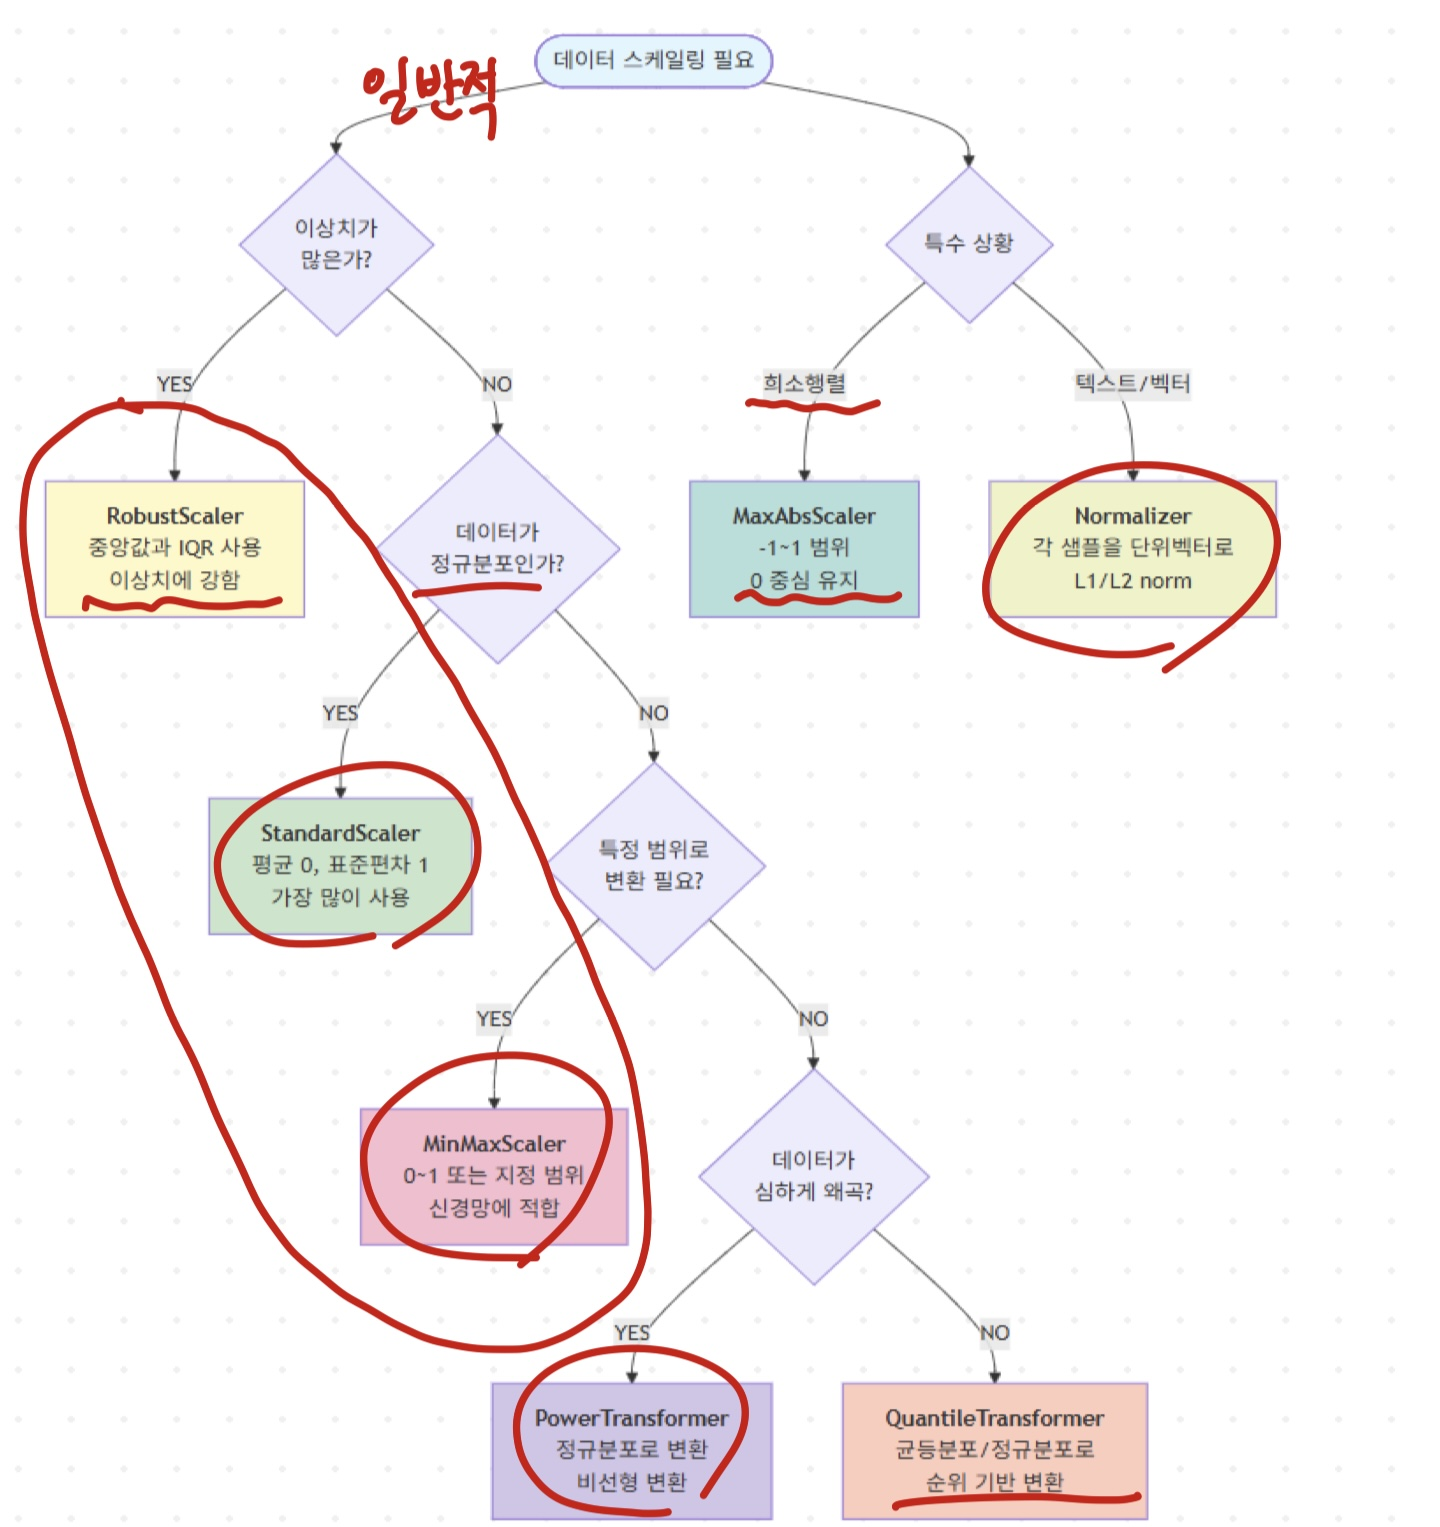

In [3]:
# 데이터 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# csv 데이터 불러오기
url = 'https://openmv.net/file/travel-times.csv'
df = pd.read_csv(url)
df.to_csv('travel-times.csv', index=False)

In [4]:
# 사용할 변수 선택 및 결측치 제거
df = pd.read_csv('travel-times.csv')

features = ['Distance', 'MaxSpeed']
df_selected = df[features].dropna()

print(df_selected)

     Distance  MaxSpeed
0       51.29     127.4
1       51.63     130.3
2       51.27     127.4
3       49.17     132.3
4       51.15     136.2
..        ...       ...
200     54.52     125.6
201     50.90     123.7
202     51.96     132.6
203     53.28     125.8
204     51.73     125.0

[205 rows x 2 columns]


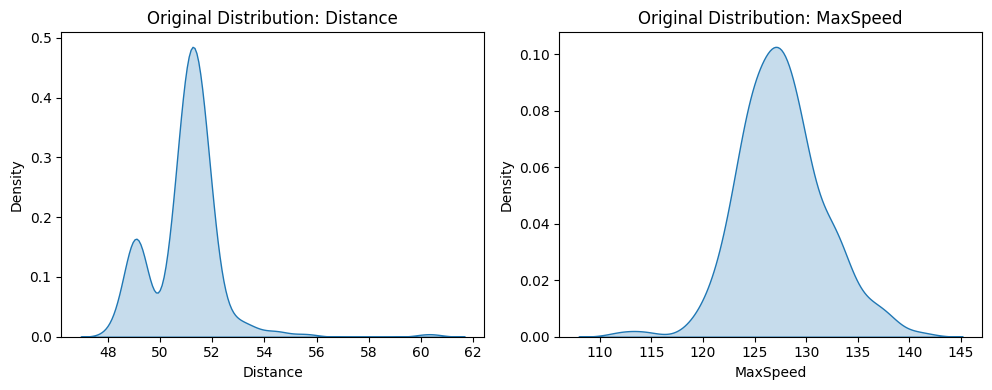

In [5]:
# Min-Max 정규화(최소값 0, 최대값 1로 변환)
# 1. 정규화 전 분포 시각화
plt.figure(figsize=(15,4))
for i, col in enumerate(features): # 인덱스(숫자), 문자열(컬럼 이름)
    plt.subplot(1, 3, i + 1) # 1행 3열의 서브플롯 구조에서 i+1 번째 위치에 그래프 그림
    sns.kdeplot(df_selected[col], fill=True) # seaborn의 KDE plot을 활용해 각 변수의 분포 곡선, 곡선 아래 영역을 색으로 채움
    plt.title(f'Original Distribution: {col}')
plt.tight_layout() #서브플롯 간 간격 자동 조정 (라벨 겹침 방지)
plt.show()

In [6]:
# 2. Min-Max 정규화 수행
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
print(df_scaled)

     Distance  MaxSpeed
0    0.247500  0.529617
1    0.275833  0.630662
2    0.245833  0.529617
3    0.070833  0.700348
4    0.235833  0.836237
..        ...       ...
200  0.516667  0.466899
201  0.215000  0.400697
202  0.303333  0.710801
203  0.413333  0.473868
204  0.284167  0.445993

[205 rows x 2 columns]


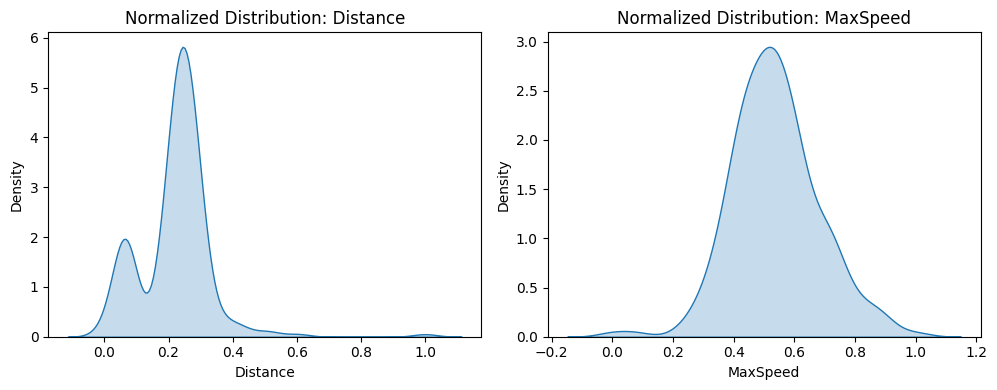

In [7]:
# 3. 정규화 후 분포 시각화
plt.figure(figsize=(15,4 ))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_scaled[col], fill=True)
    plt.title(f'Normalized Distribution: {col}')
plt.tight_layout()
plt.show()

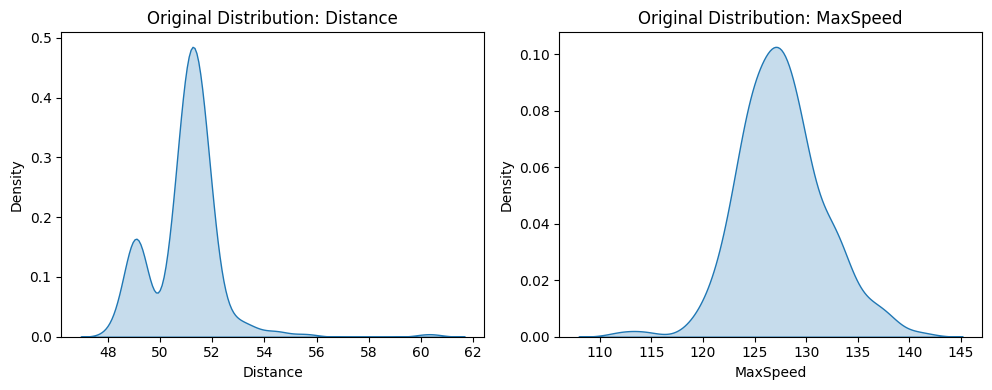

In [8]:
# Z-점수 표준화(평균 0, 표준편차 1로 변환)
# 1. 원래 분포 시각화
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_selected[col], fill=True)
    plt.title(f'Original Distribution: {col}')
plt.tight_layout()
plt.show()

In [9]:
# 2. 표준화(StandardScaler) 적용
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
print(df_standardized)

     Distance  MaxSpeed
0    0.234061 -0.046549
1    0.492032  0.657613
2    0.218887 -0.046549
3   -1.374462  1.143242
4    0.127838  2.090219
..        ...       ...
200  2.684783 -0.483616
201 -0.061846 -0.944963
202  0.742415  1.216087
203  1.743949 -0.435053
204  0.567906 -0.629304

[205 rows x 2 columns]


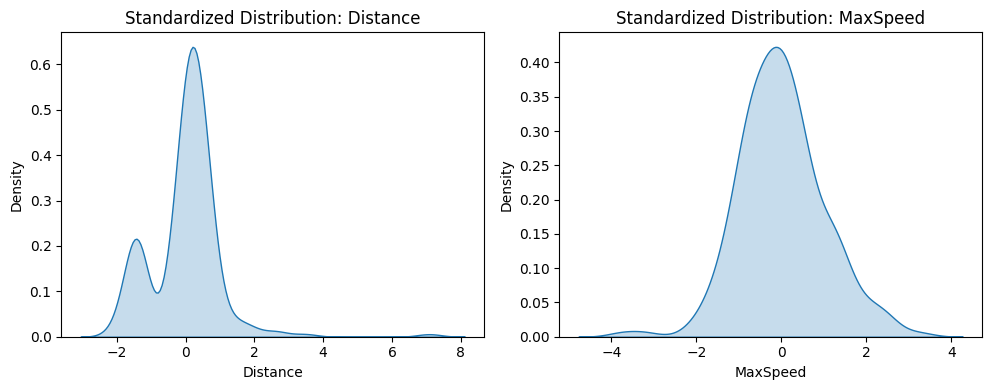

In [10]:
# 3. 표준화 후 분포 시각화
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_standardized[col], fill=True)
    plt.title(f'Standardized Distribution: {col}')
plt.tight_layout()
plt.show()

## 범주형 데이터 인코딩(encoding)
- 레이블 인코딩(label encoding): 범주형 값들을 고유한 정수값으로 매핑, 원본에 없는 우열관계 생성, 순서 보존되지 않음 cf) 순위형 자료는 순위형 인코딩(ordinal encoding) 수행
  * 선형 회귀나 SVM처럼 숫자 크기의 의미를 그대로 사용하는 모델에서 부적절, Random Forest나 XGBoost 등의 트리 기반 모델 레이블 인코딩 잘 처리!
- 원-핫 인코딩(one-hot encoding): 범주의 각 값마다 새로운 이진 가짜(dummy) 변수를 만들어 표시(pd.get_dummies 함수)
  * N개의 서로 다른 범주가 있다면 N개의 새로운 열을 만들고, 해당 범주에 해당하는 행에만 1, 나머지는 0을 넣음
  * 범주 간에 인코딩된 숫자에 의한 크기 의미가 부여되지 않음, 범주 간 거리 왜곡을 막을 수 있음
  * 선형 모델(선형 회귀, 로지스틱 회귀), SVM, 신경망, 범주 간 순서가 없는 명목형 자료, 거리 기반 알고리즘(클러스터링, 군집 분석)에서 사용
  * 가짜 변수 함정(dummy variable trap): 생성된 가짜 변수들은 합이 항상 1로 고정, 선형 종속 관계 형성 -> 선형 모델 학습 시 다중공선성(multicollinearity) 문제 유발 -> 가짜 변수 중 하나를 제거(drop) -> 나머지 가짜 변수로부터 해당 범주값 유추 -> 선형 모델 학습시키면 제거된 범주가 기준 범주가 되고, 다른 가짜 변수의 계수가 산출되면 이는 기준 범주와 비교한 계수로 해석 -> 즉, 원-핫 인코딩을 선형 모델에 적용할 경우 언제나 drop_first=True 매개변수 포함!
- Binary/Base-N 인코딩: 범주->정수->2진수(또는 N진수) 비트로 분해
- Hasing Trick(특징 해싱) 해시함수로 고정 길이 벡터에 투사
- Frequency/Count 인코딩: 번주의 빈도나 건수로 치환(희소성 완화, 간단/강력)
- Cyclical 인코딩: 월/요일/각도처럼 순환형 -> sin, cos로 투영(경계 연속성 보존)
- 엔티티 임베딩(Neural Embedding): 범주를 학습 가능한 밀집 벡터로 매핑(딥러닝)
- Ordinal(순서) 인코딩: 의미 있는 순서가 있을 때 정수로 매핑(Small<Medium<Large)

In [12]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

# origin 범주형 열 확인
print(df['DayOfWeek'].unique())

# Label Encoding 수행
encoder_label = LabelEncoder()
df['DayOfWeek_label'] = encoder_label.fit_transform(df['DayOfWeek'])

# 인코딩 결과 확인
print(df[['DayOfWeek', 'DayOfWeek_label']].head(10))

['Friday' 'Wednesday' 'Tuesday' 'Monday' 'Thursday']
   DayOfWeek  DayOfWeek_label
0     Friday                0
1     Friday                0
2  Wednesday                4
3  Wednesday                4
4    Tuesday                3
5    Tuesday                3
6     Monday                1
7     Monday                1
8     Friday                0
9   Thursday                2


In [19]:
# 순위형 인코딩
from sklearn.preprocessing import OrdinalEncoder

# origin 범주형 열 확인
print(df['DayOfWeek'].unique())

# Label Encoding 수행
encoder_ordinal = OrdinalEncoder(categories=[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']])
df['DayOfWeek_label'] = encoder_ordinal.fit_transform(df[['DayOfWeek']])

# 인코딩 결과 확인
print(df[['DayOfWeek', 'DayOfWeek_label']].head(10))

['Friday' 'Wednesday' 'Tuesday' 'Monday' 'Thursday']
   DayOfWeek  DayOfWeek_label
0     Friday              4.0
1     Friday              4.0
2  Wednesday              2.0
3  Wednesday              2.0
4    Tuesday              1.0
5    Tuesday              1.0
6     Monday              0.0
7     Monday              0.0
8     Friday              4.0
9   Thursday              3.0


In [14]:
# 원-핫 인코딩
# origin 범주형 열 확인
print(df['DayOfWeek'].unique())

# one-hot encoding 수행
df_onehot = pd.get_dummies(df, columns=['DayOfWeek'])

# 원-핫 인코딩 결과 확인
print(df_onehot.head())

['Friday' 'Wednesday' 'Tuesday' 'Monday' 'Thursday']
       Date StartTime GoingTo  Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  \
0  1/6/2012     16:37    Home     51.29     127.4      78.3            84.8   
1  1/6/2012     08:20     GSK     51.63     130.3      81.8            88.9   
2  1/4/2012     16:17    Home     51.27     127.4      82.0            85.8   
3  1/4/2012     07:53     GSK     49.17     132.3      74.2            82.9   
4  1/3/2012     18:57    Home     51.15     136.2      83.4            88.1   

  FuelEconomy  TotalTime  MovingTime Take407All Comments  DayOfWeek_label  \
0         NaN       39.3        36.3         No      NaN                0   
1         NaN       37.9        34.9         No      NaN                0   
2         NaN       37.5        35.9         No      NaN                4   
3         NaN       39.8        35.6         No      NaN                4   
4         NaN       36.8        34.8         No      NaN                3   

   DayOfW

In [17]:
# one-hot encoding 수행(첫 번째 범주를 가짜 변수로 변환하지 않고 버리도록 유도하는 매개변수 추가)
# 원-핫 인코딩을 선형 모델에 적용할 경우 언제나 drop_first=True 매개변수 포함!
df_onehot = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)

# 원-핫 인코딩 결과 확인
print(df_onehot.head(1))

       Date StartTime GoingTo  Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  \
0  1/6/2012     16:37    Home     51.29     127.4      78.3            84.8   

  FuelEconomy  TotalTime  MovingTime Take407All Comments  DayOfWeek_label  \
0         NaN       39.3        36.3         No      NaN                0   

   DayOfWeek_Monday  DayOfWeek_Thursday  DayOfWeek_Tuesday  \
0             False               False              False   

   DayOfWeek_Wednesday  
0                False  
